# 교통 소통 정보 적용 전 모델

# - 라이브러리 Import 및 파라미터 설정

In [1]:
import os
import tensorflow as tf

from main import OptimalPathFinder 

import os
import time
import math
import copy
import random
import requests

import folium
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from haversine import haversine

# DQN Hyperparameters
DISCOUNT_FACTOR = 0.99
LEARNING_RATE = 0.001

EPSILON = 1.0
EPSILON_DECAY = 0.999
EPSILON_MIN = 0.001

BATCH_SIZE = 256
TRAIN_START = 1000
MEMORY_SIZE = 5000

# 기타 Parameters
TRAIN_MODEL_NAME = 'test_model'
TEST_MODEL_NAME = 'release'
DATA_DIR = './data'
ACCIDENT_API = 'http://218.150.247.209:52201/link' # http://10.100.20.61:{port}/link

# GPU
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
    # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
        print(e)

# - 최적경로 탐색 모델 객체 생성

In [2]:
opf = OptimalPathFinder()

# 학습 Env
opf.load_env(
    data_dir=DATA_DIR,
    accident_api=ACCIDENT_API,
    is_train=False)

# 모델 빌드
model, target_model = opf.build_model(
    model_name=TRAIN_MODEL_NAME,
    discount_factor=DISCOUNT_FACTOR,
    learning_rate=LEARNING_RATE,
    epsilon=EPSILON,
    epsilon_decay=EPSILON_DECAY,
    epsilon_min=EPSILON_MIN,
    batch_size=BATCH_SIZE,
    train_start=TRAIN_START,
    memory_size=MEMORY_SIZE
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 256)            4352      
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 70,532
Trainable params: 70,532
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1

# - 데이터 시각화

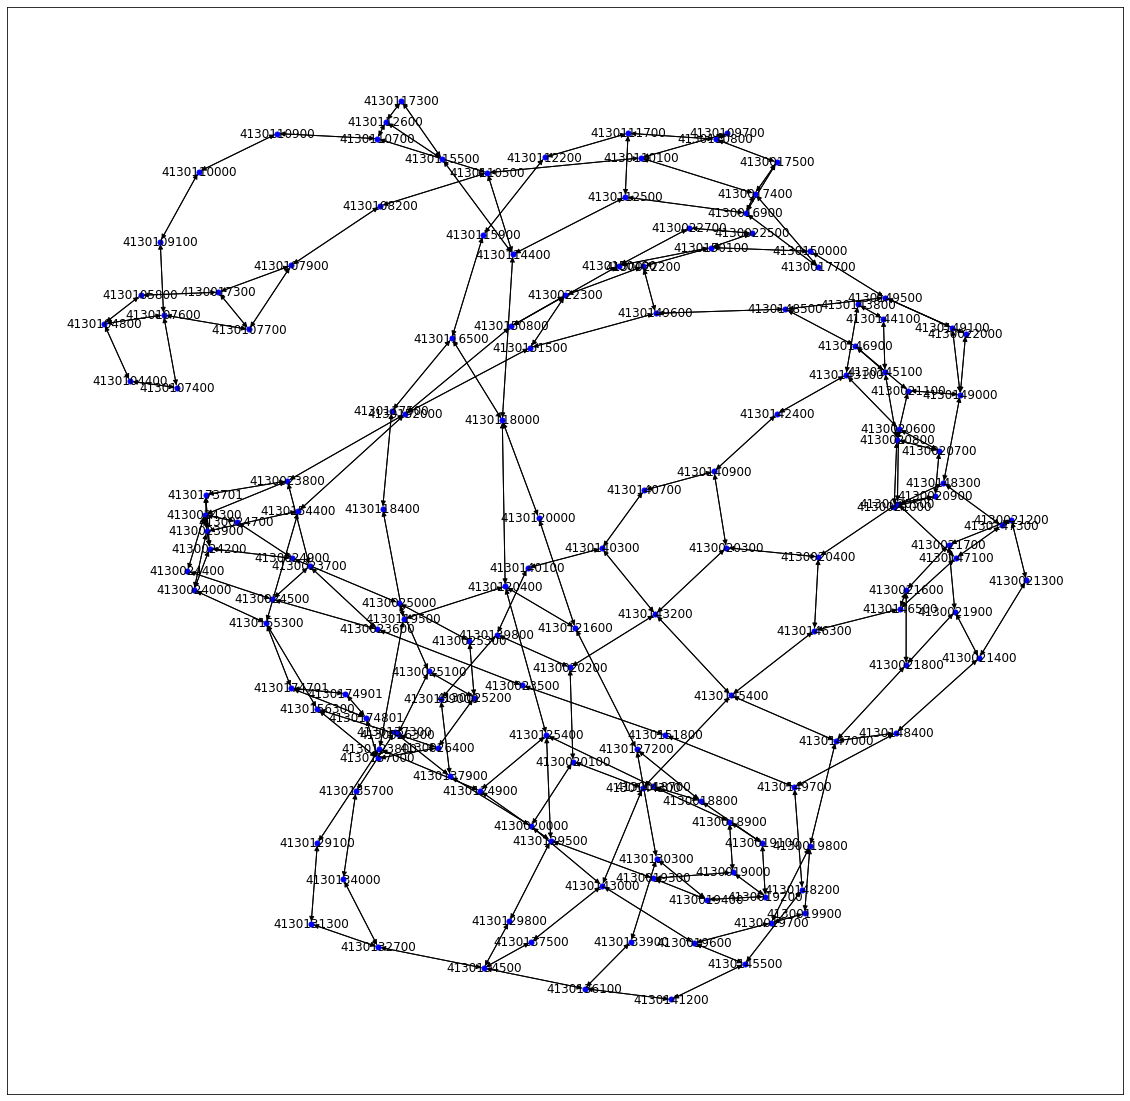

In [3]:
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(opf.env.G, k = 0.15)
nx.draw_networkx(opf.env.G, pos, node_size = 25, node_color = 'blue')
plt.show()

In [4]:
test_node = 4130019900
opf.render(TRAIN_MODEL_NAME, DATA_DIR, test_node, test_node, test_node, [], [])

# - 학습

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 2, 256)            4352      
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 516       
Total params: 70,532
Trainable params: 70,532
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 2, 256)            4352      
____________________________

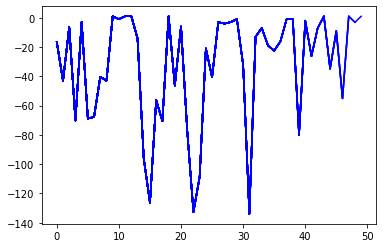

In [5]:
opf = OptimalPathFinder()

# 학습 Env
opf.load_env(
    data_dir=DATA_DIR,
    accident_api=None,#ACCIDENT_API,
    is_train=True)

# 모델 빌드
model, target_model = opf.build_model(
    model_name=TRAIN_MODEL_NAME,
    discount_factor=DISCOUNT_FACTOR,
    learning_rate=LEARNING_RATE,
    epsilon=EPSILON,
    epsilon_decay=EPSILON_DECAY,
    epsilon_min=EPSILON_MIN,
    batch_size=BATCH_SIZE,
    train_start=TRAIN_START,
    memory_size=MEMORY_SIZE
)

opf.train(
    model_name=TRAIN_MODEL_NAME,
    num_episode=50)

# - 최적경로 탐색(예측)

In [21]:
# 예측 Env
opf.load_env(
    data_dir=DATA_DIR,
    accident_api=ACCIDENT_API,
    is_train=False)

opf.load_model(
    model_name=TEST_MODEL_NAME
)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 2, 256)            4352      
_________________________________________________________________
flatten_10 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 516       
Total params: 70,532
Trainable params: 70,532
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 2, 256)            4352      
__________________________

In [30]:
# # 셔틀의 현재 위치(노드)
# shuttle = 4130019700
# # 승객의 현재 위치(노드)
# passenger = 4130143200
# # 목적지(노드)
# goal = 4130132700
nodes = [[4130155300, 4130143000, 4130114400], [4130149700, 4130023800, 4130146300], [4130107600, 4130140900, 4130023500]]

node = nodes[2]

shuttle = node[0]
passenger = node[1]
goal = node[2]
opt_path_shuttle_to_passenger, opt_path_passenger_to_goal = opf.get_optimal_path(shuttle, passenger, goal)

In [31]:
# 셔틀현재위치 ~ 승객현재위치 최적 경로 예측값
opt_path_shuttle_to_passenger

print('셔틀위치노드ID: {}\t승객위치노드ID: {}'.format(shuttle, passenger))
print('최적경로: {}'.format([n for n in opt_path_shuttle_to_passenger]))

셔틀위치노드ID: 4130107600	승객위치노드ID: 4130140900
최적경로: [4130107600, 4130107700, 4130107900, 4130108200, 4130110500, 4130114400, 4130118000, 4130120400, 4130125400, 4130129500, 4130129800, 4130134500, 4130137500, 4130143000, 4130144300, 4130145400, 4130143200, 4130140300, 4130140700, 4130140900]


In [32]:
# 승객현재위치 ~ 목적지 최적 경로 예측값
opt_path_passenger_to_goal

print('승객위치노드ID: {}\t목적지노드ID: {}'.format(passenger, goal))
print('최적경로: {}'.format([n for n in opt_path_passenger_to_goal]))

승객위치노드ID: 4130140900	목적지노드ID: 4130023500
최적경로: [4130140900, 4130020300, 4130143200, 4130145400, 4130147000, 4130148400, 4130149700, 4130151800, 4130023500]


In [33]:
opf.render(TEST_MODEL_NAME, DATA_DIR, shuttle, passenger, goal, opt_path_shuttle_to_passenger, opt_path_passenger_to_goal)